# Cardiovascular Disease Dataset Statistical Analysis

We will study with a dataset on Cardiovascular Disease.

We'll try to understand the concepts like

- true means,
- confidence intervals,
- one sample t test,
- independent samples t test,
- homogenity of variance check (Levene's test),
- One-way ANOVA,
- Chi-square test.

Dataset from: https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset

# Data Preparation

⭐ Import pandas, scipy.stats, seaborn, and matplotlib.pyplot libraries

In [44]:
import pandas as pd
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

⭐Run the following code to read in the "cardio.csv" file.

In [2]:
df = pd.read_csv(r"C:\Users\serda\Desktop\SD RECOVERY\DATA SCIENCE\Statistics\cardio.csv", sep=";")

In [3]:
df=df.sample(500, random_state=42)

In [4]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
46730,66728,21770,1,156,64.0,140,80,2,1,0,0,1,1
48393,69098,21876,1,170,85.0,160,90,1,1,0,0,1,1
41416,59185,23270,1,151,90.0,130,80,1,1,0,0,1,1
34506,49288,19741,1,159,97.0,120,80,1,1,0,0,1,1
43725,62481,18395,1,164,68.0,120,80,1,1,0,0,1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 46730 to 42173
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           500 non-null    int64  
 1   age          500 non-null    int64  
 2   gender       500 non-null    int64  
 3   height       500 non-null    int64  
 4   weight       500 non-null    float64
 5   ap_hi        500 non-null    int64  
 6   ap_lo        500 non-null    int64  
 7   cholesterol  500 non-null    int64  
 8   gluc         500 non-null    int64  
 9   smoke        500 non-null    int64  
 10  alco         500 non-null    int64  
 11  active       500 non-null    int64  
 12  cardio       500 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 54.7 KB


In [6]:
df.shape

(500, 13)

In [7]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000
mean,49656.324000,19460.940000,1.368000,164.746000,74.093400,127.91200,98.908000,1.338000,1.192000,0.07800,0.046000,0.762000,0.492000
std,27694.652229,2444.264657,0.482744,8.017609,14.340822,40.82349,130.985839,0.651617,0.540111,0.26844,0.209695,0.426286,0.500437
min,172.000000,14319.000000,1.000000,144.000000,43.000000,-120.00000,0.000000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000
25%,26990.500000,17804.000000,1.000000,159.000000,65.000000,120.00000,80.000000,1.000000,1.000000,0.00000,0.000000,1.000000,0.000000
50%,49225.500000,19669.000000,1.000000,165.000000,72.000000,120.00000,80.000000,1.000000,1.000000,0.00000,0.000000,1.000000,0.000000
75%,72126.500000,21326.250000,2.000000,170.000000,80.000000,140.00000,90.000000,1.000000,1.000000,0.00000,0.000000,1.000000,1.000000
max,99934.000000,23670.000000,2.000000,198.000000,160.000000,907.00000,1200.000000,3.000000,3.000000,1.00000,1.000000,1.000000,1.000000


⭐Let's get rid of the outliers, moreover blood pressure could not be negative value!

In [9]:
df.set_index(["id"], inplace=True)

In [13]:
df["age"] = np.round(df.age/365)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
66728,60.0,1,156,64.0,140,80,2,1,0,0,1,1
69098,60.0,1,170,85.0,160,90,1,1,0,0,1,1
59185,64.0,1,151,90.0,130,80,1,1,0,0,1,1
49288,54.0,1,159,97.0,120,80,1,1,0,0,1,1
62481,50.0,1,164,68.0,120,80,1,1,0,0,1,0


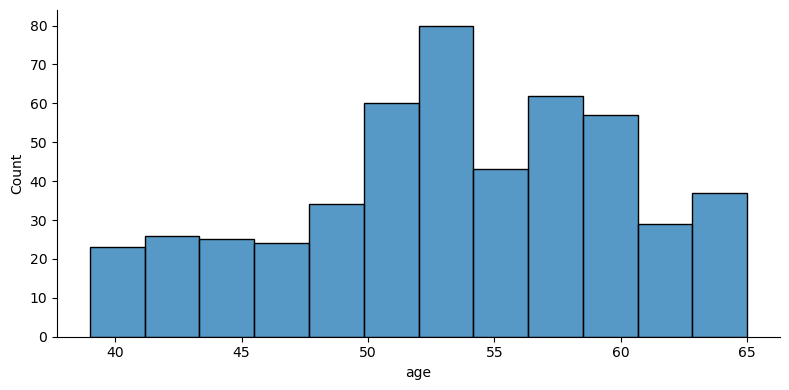

In [15]:
sns.displot(x="age",height= 4, aspect= 2, data=df)

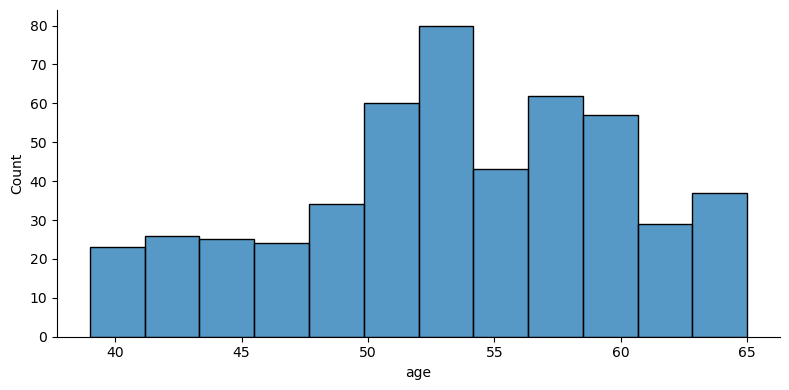

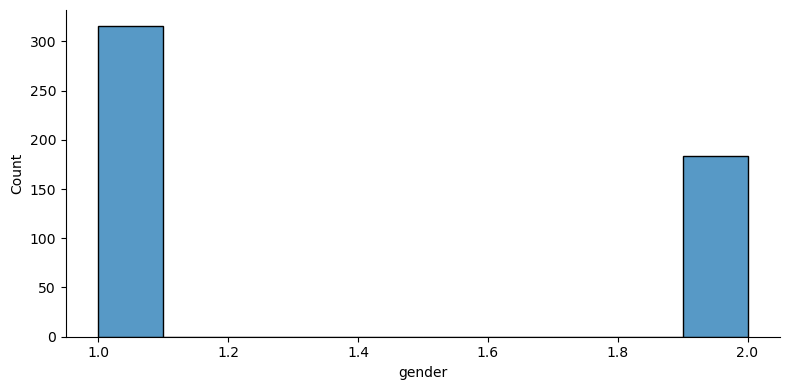

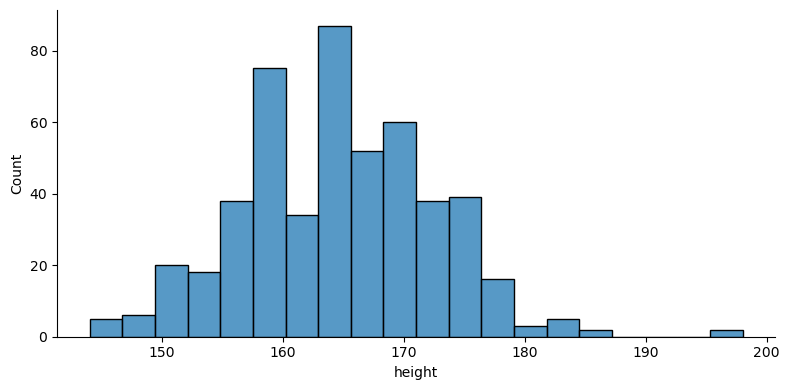

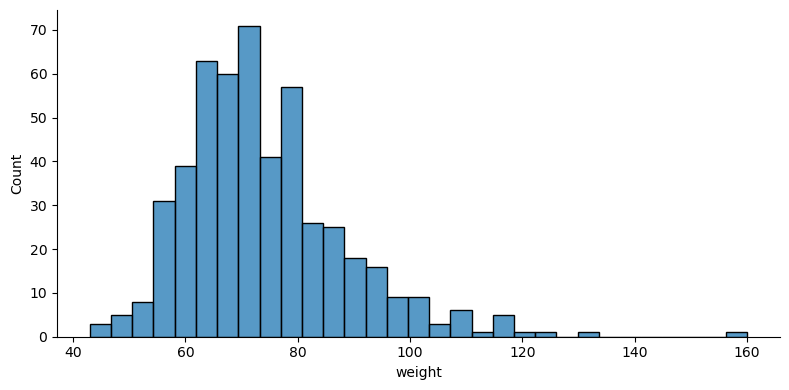

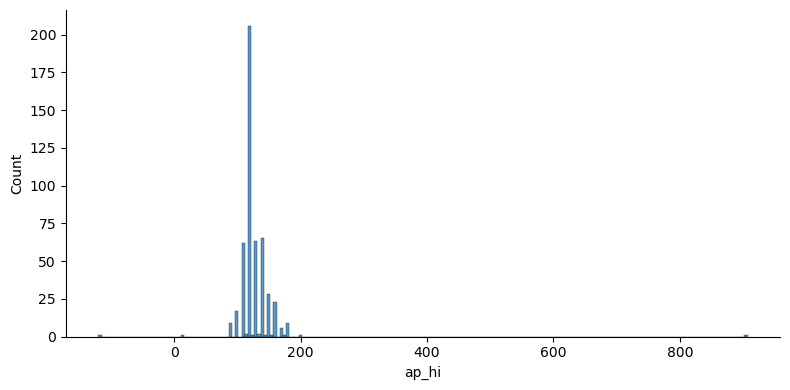

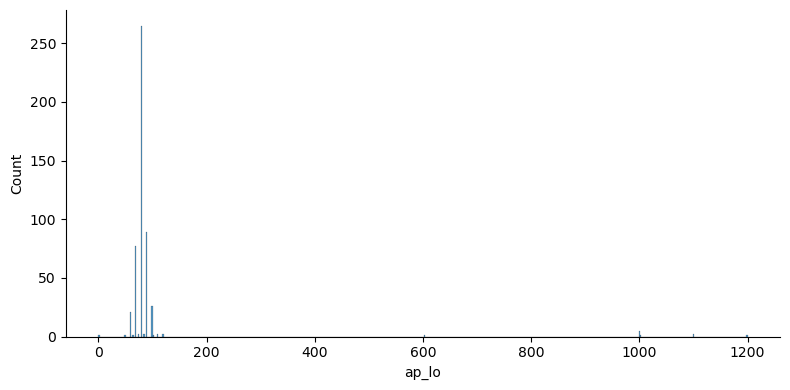

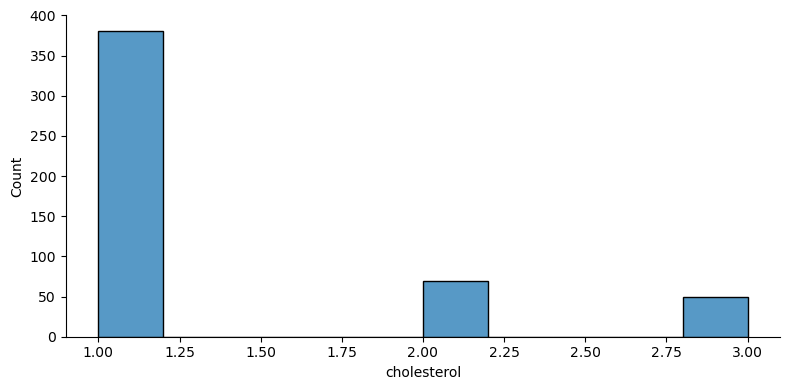

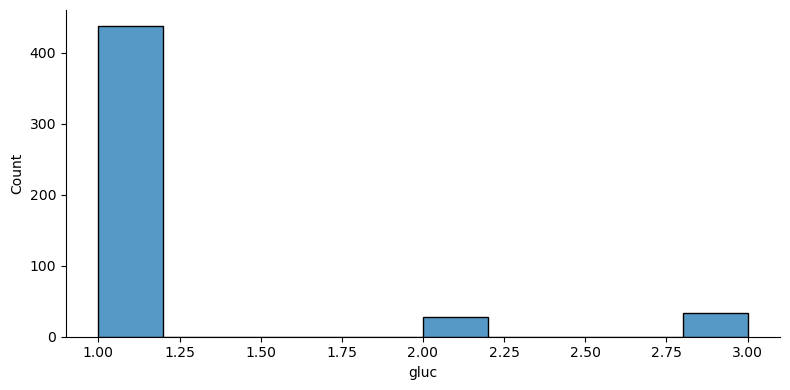

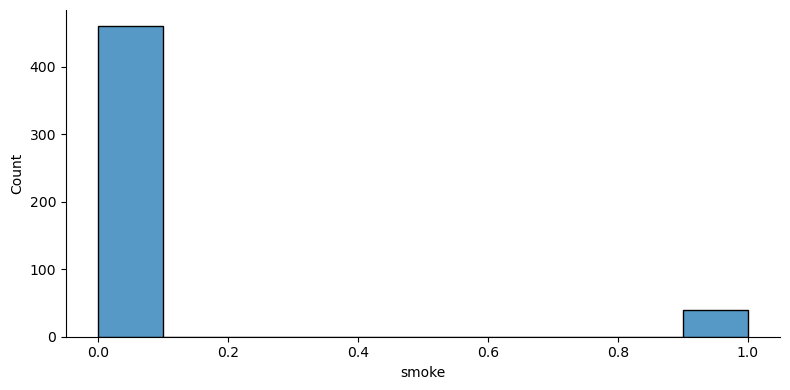

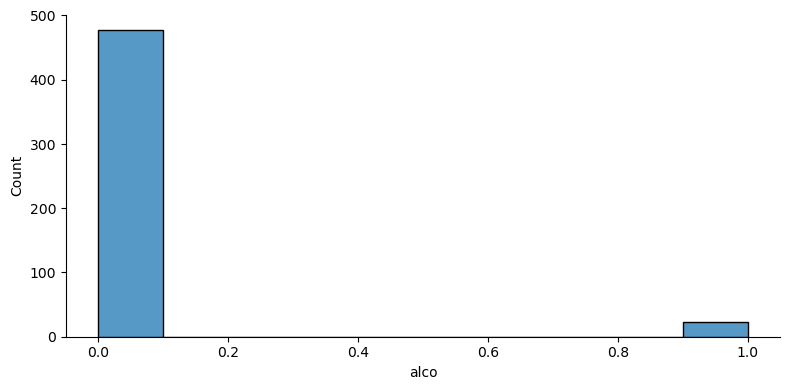

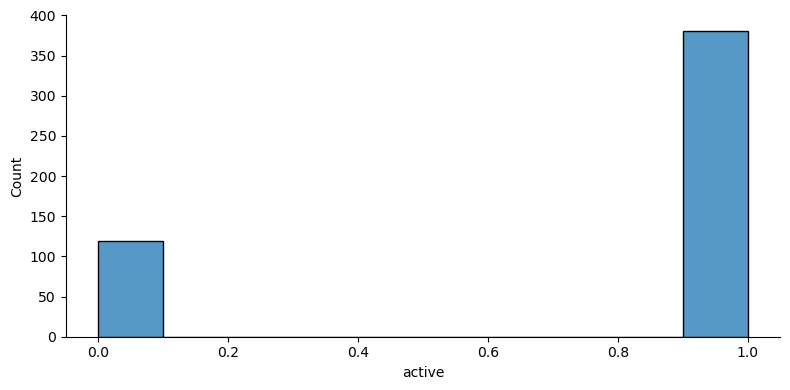

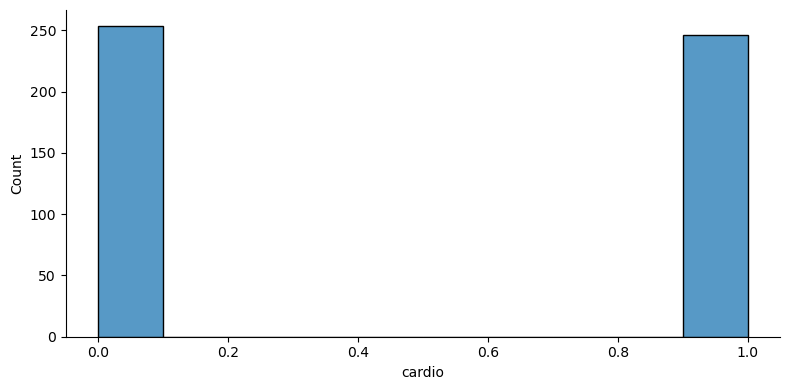

In [16]:
for col in df.columns:
    sns.displot(x=col, height= 4, aspect= 2, data=df)

<Axes: xlabel='ap_hi'>

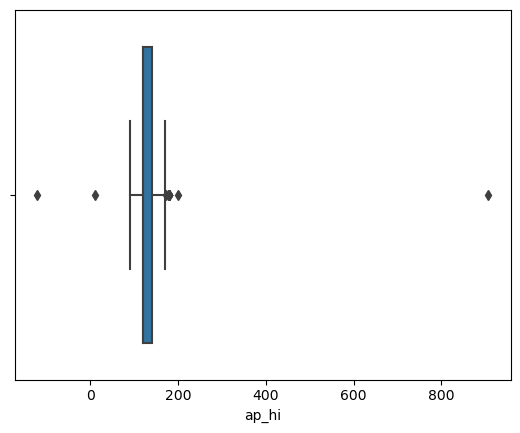

In [17]:
sns.boxplot(x="ap_hi", data=df)

In [21]:
df = df[df["ap_hi"] < 300]
df = df[df["ap_hi"] > 25]

SyntaxError: unmatched ']' (356259795.py, line 1)

<Axes: xlabel='ap_hi'>

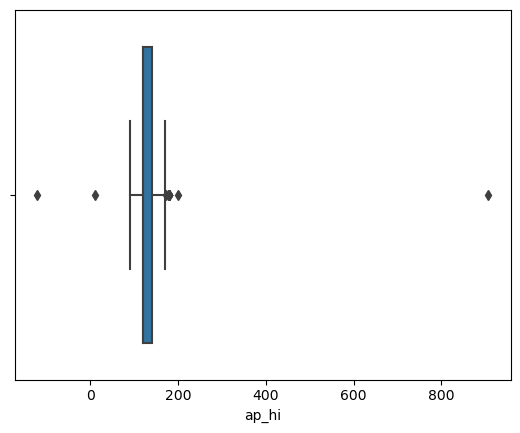

In [18]:
sns.boxplot(x="ap_hi", data=df)

In [ ]:
df = df[df["ap_lo"] < 250]
df = df[df["ap_lo"] > 0]

In [20]:
df.shape

(500, 12)

In [19]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000
mean,53.318000,1.368000,164.746000,74.093400,127.91200,98.908000,1.338000,1.192000,0.07800,0.046000,0.762000,0.492000
std,6.707522,0.482744,8.017609,14.340822,40.82349,130.985839,0.651617,0.540111,0.26844,0.209695,0.426286,0.500437
min,39.000000,1.000000,144.000000,43.000000,-120.00000,0.000000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000
25%,49.000000,1.000000,159.000000,65.000000,120.00000,80.000000,1.000000,1.000000,0.00000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,165.000000,72.000000,120.00000,80.000000,1.000000,1.000000,0.00000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,170.000000,80.000000,140.00000,90.000000,1.000000,1.000000,0.00000,0.000000,1.000000,1.000000
max,65.000000,2.000000,198.000000,160.000000,907.00000,1200.000000,3.000000,3.000000,1.00000,1.000000,1.000000,1.000000


## Task-1. Is the Systolic blood pressure population mean 122mmhg?

ap_hi => It's the Systolic blood pressure i.e. Pressure exerted when Blood is ejected in arteries. Normal value : 122 mm Hg for all adults aged 18 and over

⭐What is the mean for Systolic blood pressure?

In [22]:
df.ap_hi.mean()

127.912

⭐What is the standard deviation for Systolic blood pressure?

In [23]:
df.ap_hi.std()

40.82349042820187

⭐What is the standard error of the mean for Systolic blood pressure?

In [24]:
df.ap_hi.sem()

1.8256819935254276

⭐What are the descriptive statistics of the mean for Systolic blood pressure?

In [25]:
df.ap_hi.describe()

count    500.00000
mean     127.91200
std       40.82349
min     -120.00000
25%      120.00000
50%      120.00000
75%      140.00000
max      907.00000
Name: ap_hi, dtype: float64

## Confidence Interval using the t Distribution

Key Notes about Confidence Intervals

💡A point estimate is a single number.

💡A confidence interval, naturally, is an interval.

💡Confidence intervals are the typical way to present estimates as an interval range.

💡The point estimate is located exactly in the middle of the confidence interval.

💡However, confidence intervals provide much more information and are preferred when making inferences.

💡The more data you have, the less variable a sample estimate will be.

💡The lower the level of confidence you can tolerate, the narrower the confidence interval will be.

⭐Investigate the given task by calculating the confidence interval. (Use 90%, 95% and 99% CIs)

In [27]:
stats.t.interval(0.95, len(df.ap_hi)-1, loc=df.ap_hi.mean(), scale=df.ap_hi.sem())

(124.32502892872364, 131.49897107127637)

## One Sample t Test

⭐Investigate the given task by using One Sample t Test.

Key Notes about Hypothesis Testing (Significance Testing)

💡Assumptions

💡Null and Alternative Hypothesis

💡Test Statistic

💡P-value

💡Conclusion

Conduct the significance test. Use scipy.stats.ttest_1samp

In [ ]:
# mu = 122
# mu != 122

In [29]:
onesample = stats.ttest_1samp(df.ap_hi, 122)
onesample

TtestResult(statistic=3.2382419397059565, pvalue=0.001282757234549314, df=499)

## Task-2. Is There a Significant Difference Between Males and Females in Systolic Blood Pressure?

H0: µ1 = µ2 ("the two population means are equal")

H1: µ1 ≠ µ2 ("the two population means are not equal")

⭐Show descriptives for 2 groups

In [36]:
df.groupby("gender").describe()["ap_hi"]

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
1,316.0,128.262658,47.734823,12.0,120.0,120.0,140.0,907.0
2,184.0,127.309783,24.930871,-120.0,120.0,120.0,140.0,200.0


___🚀Test the assumption of homogeneity of variance Hint: Levene’s Test

The hypotheses for Levene’s test are:

H0: "the population variances of group 1 and 2 are equal"

H1: "the population variances of group 1 and 2 are not equal"

In [37]:
stat, p = stats.levene(df[df["gender"]==1]["ap_hi"],df[df["gender"]==2]["ap_hi"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
  print('The population variances of group 1 and 2 are equal (fail to reject H0)')
else:
  print('The population variances of group 1 and 2 are not equal (reject H0)')

Statistics=0.162, p=0.688
The population variances of group 1 and 2 are equal (fail to reject H0)


___🚀Conduct the significance test. Use scipy.stats.ttest_ind

H0: µ1 = µ2 ("the two population means are equal")

H1: µ1 ≠ µ2 ("the two population means are not equal")

In [38]:
stats.ttest_ind(df[df["gender"]==1]["ap_hi"],df[df["gender"]==2]["ap_hi"], equal_var=True)

Ttest_indResult(statistic=0.251469606285927, pvalue=0.8015547917409211)

## Task-3. Is There a Relationship Between Glucose and Systolic Blood Pressure?

⭐Draw a boxplot to see the relationship.

<Axes: xlabel='gluc', ylabel='ap_hi'>

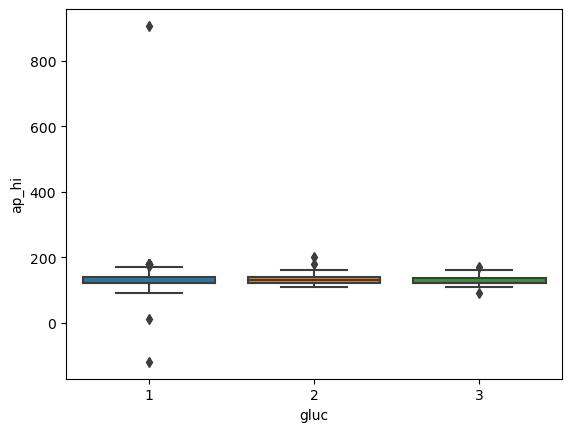

In [39]:
sns.boxplot(x="gluc", y="ap_hi", data=df)

⭐Show the descriptive statistics of 3 groups.

In [40]:
df.groupby("gluc").describe()["ap_hi"]

,count,mean,std,min,25%,50%,75%,max
gluc,,,,,,,,
1,438.0,127.502283,43.041130,-120.0,120.0,120.0,140.0,907.0
2,28.0,133.928571,20.965454,110.0,120.0,130.0,140.0,200.0
3,34.0,128.235294,16.600582,90.0,120.0,120.0,137.5,170.0


⭐Conduct the relavant statistical test to see if there is a significant difference between the mean of the groups.

In [ ]:
# H0 = All means are equal
# H1 = At least one of the means is different

In [ ]:
# Fail to reject. All means are equal. At this alpha level, we don't have sufficient evidence to reject H0. 

In [41]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison
# compare the height between each diet, using 95% confidence interval
mc = MultiComparison(df['ap_hi'], df['gluc'])
tukey_result = mc.tukeyhsd(alpha=0.05)
print(tukey_result)
print('Unique gluc groups: {}'.format(mc.groupsunique))

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     1      2   6.4263 0.6992 -12.3056 25.1582  False
     1      3    0.733 0.9944  -16.375  17.841  False
     2      3  -5.6933 0.8487 -30.2167 18.8302  False
-----------------------------------------------------
Unique gluc groups: [1 2 3]


## Task-4. Is There a Relationship Between Physical activity vs. Presence or absence of cardiovascular disease?

### Physical activity vs. Presence or absence of cardiovascular disease

⭐Create a crosstab using Pandas.

In [42]:
crosstab = pd.crosstab(df["active"], df["cardio"])
crosstab

cardio,0,1
active,,
0,56,63
1,198,183


⭐Conduct chi-square test to see if there is a relationship between 2 categorical variables.

In [47]:
chi, p, dof, expected = stats.chi2_contingency(crosstab)

print('stat=%.3f, p=%.4f' % (stat, p))

stat=0.689, p=0.4065


In [46]:
alpha = 0.01

if p < alpha:
    print('At {} level of significance, we can REJECT the Null Hypothesis (H0) in favor of Alternative hypothesis (Ha) and \nit can be concluded that two categorical variables {} and {} are statistically dependent.'.format(alpha, crosstab.index.names, crosstab.columns.names))
else:
    print('At {} level of significance, we FAIL to REJECT the Null Hypothesis (H0)and \nit can be concluded that two categorical variables {} and {} are statistically independent.'.format(alpha, crosstab.index.names, crosstab.columns.names))

At 0.01 level of significance, we FAIL to REJECT the Null Hypothesis (H0)and 
it can be concluded that two categorical variables ['active'] and ['cardio'] are statistically independent.


END OF THE PROJECT